## The Mood of the News on Twitter
The purpose of this project is to look at mood of the world according to the twitter profiles of news agencies. I looked at Twitter feed of Fox News, CNN, BBC World, CBS News, and the New York times. This was done by performing a sentiment analysis on the accounts and then plotted the results.

In [2]:
## ------- Dependencies ------- ##
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
warnings.filterwarnings("ignore")

## ------- API keys ------- ##
import keys

## ------- VADER ------- ##
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## ------- API Keys ------- ##
consumer_key = keys.consumer_key
consumer_secret = keys.consumer_secret
access_token = keys.access_token
access_token_secret = keys.access_token_secret

/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
## ------- API Authentication ------- ##
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## ------- Twitter Accounts ------- ##
news_source = ["CNN","nytimes", "CBSNews", "BBCWorld", "FoxNews"] 

## Grab Tweets

In [4]:
## ------- tweet information dictionary ------- ##
tweet_data = {
    "Source": [],
    "Tweet_text": [],
    "Date_tweeted": [],
    "Vader_score": [],
    "Positive_score": [],
    "Neutral_score": [],
    "Negative_score": []}

## ------- 500 tweets from Twitter accounts ------- ##
for x in range(5):

    # Looping through news sources
    for source in news_source:

        # Grabbing tweet data
        tweets = api.user_timeline(source, page=x)

        # Tweets stored in dictionary
        for tweet in tweets:
            
            # Twitter data from JSON 
            tweet_data["Source"].append(tweet["user"]["name"])
            tweet_data["Tweet_text"].append(tweet["text"])
            tweet_data["Date_tweeted"].append(tweet["created_at"])

            # VADER Analysis on tweets
            tweet_data["Vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["Positive_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["Neutral_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["Negative_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [5]:
## ------ DataFrame ------
tweet_df = pd.DataFrame(tweet_data, columns=["Source", 
                                             "Tweet_text", 
                                             "Date_tweeted",
                                             "Vader_score",
                                             "Positive_score",
                                             "Neutral_score",
                                             "Negative_score"])

## ----- Printing Dataframe ------
tweet_df.head(20)

,Source,Tweet_text,Date_tweeted,Vader_score,Positive_score,Neutral_score,Negative_score
0,CNN,A family searches for answers after a death in...,Fri Aug 24 20:41:07 +0000 2018,-0.5994,0.000,0.719,0.281
1,CNN,The discovery of two dinosaur fossils in China...,Fri Aug 24 20:41:07 +0000 2018,-0.2960,0.000,0.891,0.109
2,CNN,Lamborghini just introduced an even more power...,Fri Aug 24 20:31:00 +0000 2018,0.4754,0.162,0.838,0.000
3,CNN,How patients and families handle end-of-life d...,Fri Aug 24 20:26:08 +0000 2018,0.1531,0.103,0.897,0.000
4,CNN,"A 1962 Ferrari 250 GTO, estimated to be worth ...",Fri Aug 24 20:21:00 +0000 2018,0.6478,0.209,0.791,0.000
5,CNN,"At first, this company threw its support behin...",Fri Aug 24 20:11:03 +0000 2018,0.4019,0.124,0.876,0.000
6,CNN,An isolated Amazon tribe with no known contact...,Fri Aug 24 20:01:00 +0000 2018,-0.4215,0.067,0.754,0.179
7,CNN,A juror from the Paul Manafort trial said she ...,Fri Aug 24 19:56:22 +0000 2018,-0.6124,0.000,0.792,0.208
8,CNN,A number of World War II munitions exploded as...,Fri Aug 24 19:51:05 +0000 2018,-0.5574,0.064,0.743,0.193
9,CNN,The New York State Attorney General's Office p...,Fri Aug 24 19:46:06 +0000 2018,-0.5267,0.000,0.841,0.159


In [6]:
## ------ 500 tweets ------
tweet_df.count()

Source            500
Tweet_text        500
Date_tweeted      500
Vader_score       500
Positive_score    500
Neutral_score     500
Negative_score    500
dtype: int64

In [7]:
## ------ Converting dates to datetimes ------
tweet_df["Date_tweeted"] = pd.to_datetime(tweet_df["Date_tweeted"])

## ------ DF sort by date ------ 
tweet_df.sort_values("Date_tweeted", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

## ------ Printing df ------
tweet_df.head()

,Source,Tweet_text,Date_tweeted,Vader_score,Positive_score,Neutral_score,Negative_score
0,BBC News (World),RT @BBCAfrica: Uganda's Bobi Wine: Charges aga...,2018-08-23 08:43:11,-0.2732,0.0,0.840,0.160
1,BBC News (World),Donald Trump says he's asked his secretary of ...,2018-08-23 09:10:34,0.0000,0.0,1.000,0.000
2,BBC News (World),RT @BBCNews: 🛫❓ https://t.co/WteYf5oSGn,2018-08-23 09:16:19,0.0000,0.0,1.000,0.000
3,BBC News (World),"Police shoot knifeman in Paris, after attack t...",2018-08-23 09:35:48,-0.9246,0.0,0.472,0.528
4,BBC News (World),RT @BBCBreaking: Knifeman in Paris kills two a...,2018-08-23 09:54:43,-0.8316,0.0,0.685,0.315


## Sentiment Scatter Plot

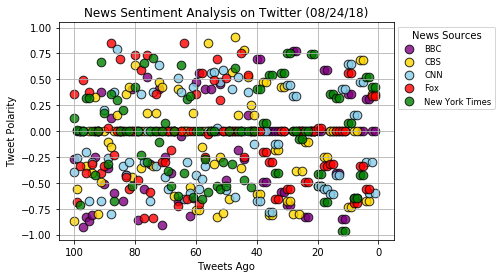

In [24]:
## ------- Tweet polarity by tweet history Scatter plot ------ ##
plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "BBC News (World)"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="purple", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "CBS News"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "CNN"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "Fox News"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "The New York Times"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="New York Times")

## ------ Graph properties ------ ##
plt.title("News Sentiment Analysis on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

## ----- Legends ----- ##
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="News Sources", 
                  labelspacing=0.5)

# Show plot
plt.show()

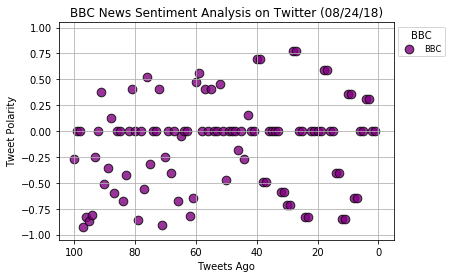

In [27]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "BBC News (World)"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="purple", s=75,
            alpha=0.8, label="BBC")
plt.title("BBC News Sentiment Analysis on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

## ----- Legends ----- ##
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="BBC", 
                  labelspacing=0.5)

# Show plot
plt.show()

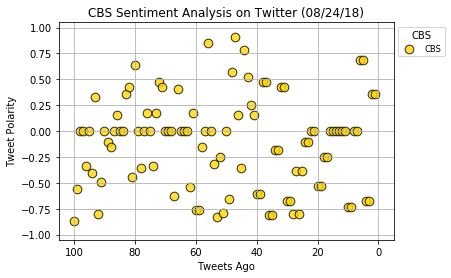

In [28]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "CBS News"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="CBS")
plt.title("CBS Sentiment Analysis on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

## ----- Legends ----- ##
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="CBS", 
                  labelspacing=0.5)

# Show plot
plt.show()

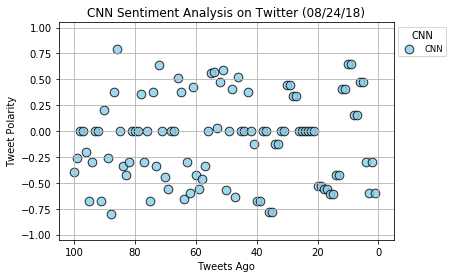

In [29]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "CNN"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="CNN")
plt.title("CNN Sentiment Analysis on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

## ----- Legends ----- ##
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="CNN", 
                  labelspacing=0.5)

# Show plot
plt.show()

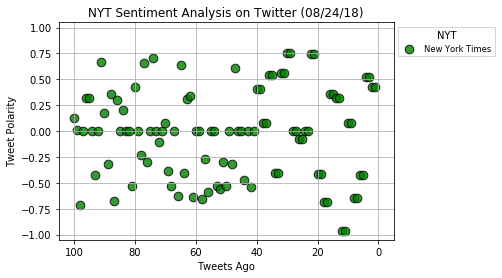

In [32]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "The New York Times"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="New York Times")
plt.title("NYT Sentiment Analysis on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

## ----- Legends ----- 
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="NYT", 
                  labelspacing=0.5)

## ----- Plot -----
plt.show()

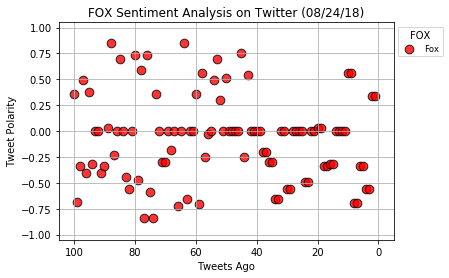

In [31]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["Source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["Source"] == "Fox News"]["Vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="Fox")
plt.title("FOX Sentiment Analysis on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

## ----- Legends ----- 
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="FOX", 
                  labelspacing=0.5)

## ----- Plot -----
plt.show()

##  Sentiment Bar Graph

In [15]:
## ------ Avergae Polarities of each news source ------ ##
tweet_df_polarity = tweet_df.groupby(["Source"]).mean()["Vader_score"]
pd.DataFrame(tweet_df_polarity)

,Vader_score
Source,
BBC News (World),-0.122487
CBS News,-0.105610
CNN,-0.082718
Fox News,-0.066010
The New York Times,-0.020186


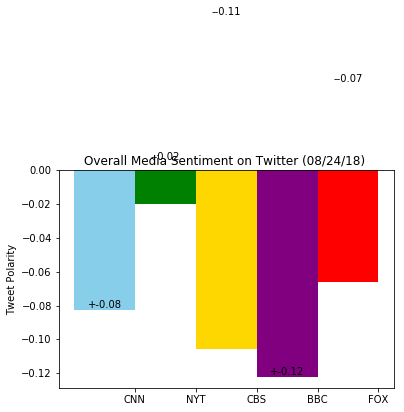

In [34]:
## ------ Tuple -------
tweets_polarity = (tweet_df_polarity["CNN"], 
                    tweet_df_polarity["The New York Times"],
                    tweet_df_polarity["CBS News"], 
                    tweet_df_polarity["BBC News (World)"],
                    tweet_df_polarity["Fox News"])
## ------  Bars for each news source ------ 
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue") 
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="green") 
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="gold") 
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='purple') 
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='red') 

## ------ Labels ------     
autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

# Orient widths, add labels, tick marks, etc. 
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("CNN", "NYT", "CBS", "BBC", "FOX"))
ax.set_autoscaley_on(True)
ax.grid(False)

## ------ Figure ------ 
fig.show()